In [3]:
import pandas as pd
import os


In [6]:
df = pd.read_csv(r"C:\Python\Projects\Sales Data\Sales_April_2019.csv")

print(df.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [16]:
# There are 12 csv files with the sales data I need to analyse. 
# In order to proceed I need to combine these files into one 
# Concatenate all the files into a single csv
# New file name: "all_sales_data.csv"

In [15]:
files = [file for file in os.listdir(r'C:/Python/Projects/Sales Data/')]

all_months_df = pd.DataFrame()

for file in files:
    df = pd.read_csv(r'C:/Python/Projects/Sales Data/'+file)
    all_months_df = pd.concat([all_months_df, df])

print(all_months_df.head())
all_months_df.to_csv("all_sales_data.csv", index=False)


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


### Analysis tasks: I am going to propose some hypothetical questions and proceed with the relevant analysis to try to answer them
### What was the best month for sales? 


In [19]:
# So as to easly read the data, I will add a new column exclusively for Months
# Dropping all NaN rows. 
len(all_months_df)

186850

In [31]:
nan_df = all_months_df[all_months_df.isna().any(axis=1)]
all_months_df = all_months_df.dropna(how='all')
len(all_months_df)


186305

In [35]:
all_months_df['Month'] = all_months_df['Order Date'].str[0:2]
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [42]:
# Converting Month table into interger
# Find 'Or' and delete it. There are rows with incorrect data
all_months_df = all_months_df[all_months_df['Order Date'].str[0:2] != 'Or']

all_months_df['Month'] = all_months_df['Month'].astype('int32')

all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [46]:
# Create a new column: Multiply Quantity Ordered x Price each
# Convert the columns to the correct type before multiplying

all_months_df['Quantity Ordered'] = pd.to_numeric(all_months_df['Quantity Ordered'])
all_months_df['Price Each'] = pd.to_numeric(all_months_df['Price Each'])

In [49]:
all_months_df['Sales'] = all_months_df['Quantity Ordered'] * all_months_df['Price Each']

all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [50]:
all_months_df.groupby('Month').sum()

C:\Users\gasto\AppData\Local\Temp\ipykernel_25092\422430429.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_months_df.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


C:\Users\gasto\AppData\Local\Temp\ipykernel_25092\1517986058.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_months_df.groupby('Month').sum()


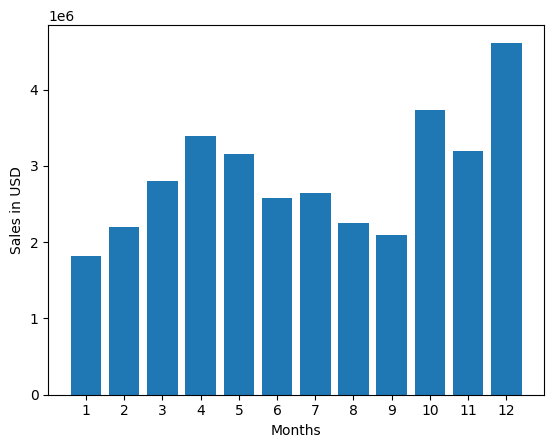

In [60]:
import matplotlib.pyplot as plt

results = all_months_df.groupby('Month').sum()
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.show()

### What product had the highest number of sales?

Text(0, 0.5, 'Product')

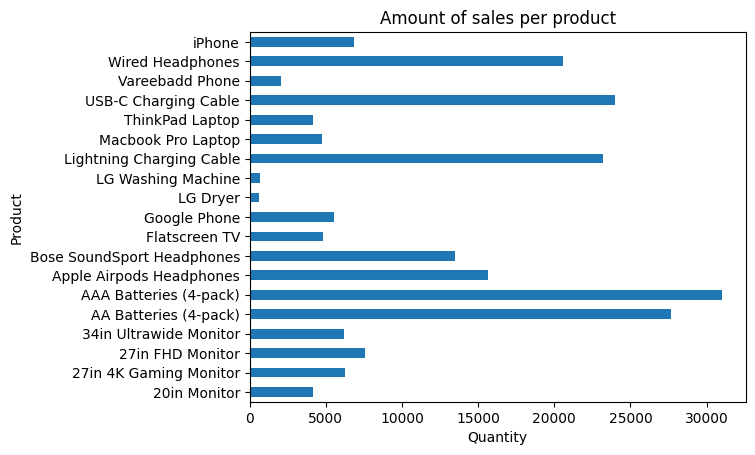

In [127]:
products_quantity_sales = all_months_df.groupby('Product')['Quantity Ordered'].sum()

products_quantity_sales.plot(kind='barh')
plt.title('Amount of sales per product')
plt.xlabel('Quantity')
plt.ylabel('Product')

### What city had the highest number of sales?

<AxesSubplot: xlabel='City'>

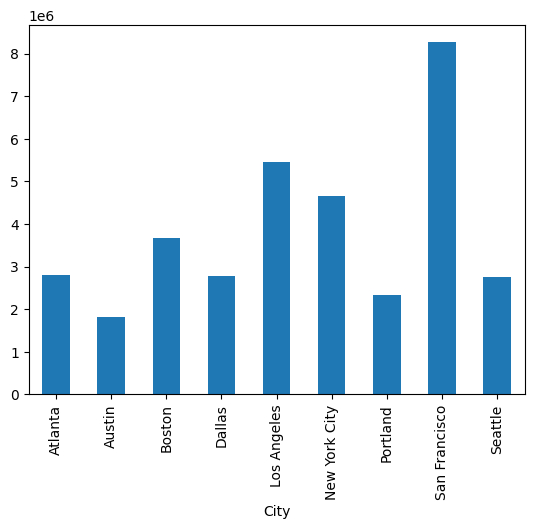

In [105]:
# Create a new column with the cities from the Purchase Address column

addresses = all_months_df['Purchase Address'].str.split(",")[1]

def extract_city(address_string):
    return address_string.split(',')[1].strip()

cities = all_months_df['Purchase Address'].apply(extract_city)

all_months_df = all_months_df.assign(City=all_months_df['Purchase Address'].apply(extract_city))
city_sales = all_months_df.groupby('City')['Sales'].sum()

city_sales.plot(kind='bar')

What time should we display ads to maximize likelihood of customer's buying products?

In [ ]:
# In order to answer this question, I will parse all the time data we possess to display it accross 24 hours

In [111]:
all_months_df['Order Date'] = pd.to_datetime(all_months_df['Order Date'])

# Create a two new columns containing hours and minutes

all_months_df['Hour'] = all_months_df['Order Date'].dt.hour
all_months_df['Minutes'] = all_months_df['Order Date'].dt.minute
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


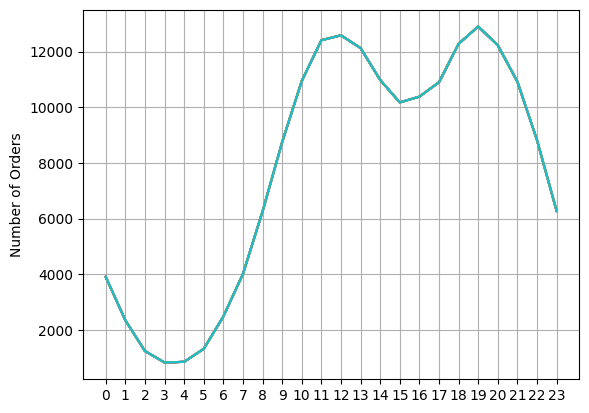

In [122]:
# Group the rows in DataFrame by the hour of the day when the purchase was made
total = all_months_df.groupby(['Hour']).count()

hours = [hour for hour, df in all_months_df.groupby('Hour')]
plt.plot(hours, total)
plt.xticks(hours)
plt.ylabel("Number of Orders")
plt.grid()

In [ ]:
## Peak hours: 11am and 7pm